In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

feature_name_df = pd.read_csv('../../../datasets/uci_har/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [15]:
def get_human_dataset():
    feature_name_df = pd.read_csv('../../../datasets/uci_har/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    feature_name = list(set(feature_name))

    X_train = pd.read_csv('../../../datasets/uci_har/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('../../../datasets/uci_har/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('../../../datasets/uci_har/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('../../../datasets/uci_har/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [19]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0.28858451, -0.020294171, -0.13290514, -0.9952786, -0.98311061, -0.91352645, -0.99511208, -0.98318457, -0.92352702, -0.93472378, -0.56737807, -0.74441253, 0.85294738, 0.68584458, 0.81426278, -0.96552279, -0.99994465, -0.99986303, -0.99461218, -0.99423081, -0.98761392, -0.94321999, -0.40774707, -0.67933751, -0.60212187, 0.92929351, -0.85301114, 0.35990976, -0.058526382, 0.25689154, -0.22484763, 0.26410572, -0.09524563, 0.27885143, -0.46508457, 0.49193596, -0.19088356, 0.37631389, 0.43512919, 0.66079033, 0.96339614, -0.14083968, 0.11537494, -0.98524969, -0.98170843, -0.87762497, -0.98500137, -0.98441622, -0.89467735, 0.89205451, -0.16126549, 0.12465977, 0.97743631, -0.12321341, 0.056482734, -0.37542596, 0.89946864, -0.97090521, -0.97551037, -0.98432539, -0.98884915, -0.91774264, -1.0, -1.0, 0.11380614, -0.590425, 0.5911463, -0.59177346, 0.59246928, -0.74544878, 0.72086167, -0.71237239, 0.71130003, -0.99511159, 0.99567491, -

In [20]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(round(accuracy, 4))

print('기본 하이퍼파라미터:', dt_clf.get_params())

0.8626
기본 하이퍼파라미터: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


결정 트리의 깊이가 예측 정확도에 주는 영향 확인

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도: 0.8637
GridSearchCV 최적 하이퍼파라미터: {'max_depth': 8}


In [25]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

cv_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.150743,0.008657,0.003290,0.000139,6,{'max_depth': 6},0.811693,0.831407,0.843537,0.872789,0.895918,0.851069,0.029923,3
1,1.438929,0.013652,0.003270,0.000079,8,{'max_depth': 8},0.821210,0.853161,0.849660,0.880272,0.914286,0.863718,0.031455,1
2,1.664828,0.038671,0.003222,0.000094,10,{'max_depth': 10},0.827328,0.827328,0.852381,0.843537,0.895918,0.849299,0.025225,4
3,1.851358,0.047113,0.003185,0.000029,12,{'max_depth': 12},0.806254,0.824609,0.847619,0.877551,0.902721,0.851751,0.034892,2
4,2.079298,0.060369,0.003301,0.000167,16,{'max_depth': 16},0.806254,0.822570,0.819048,0.864626,0.907483,0.843996,0.037315,7
5,2.096113,0.083809,0.003383,0.000291,20,{'max_depth': 20},0.815772,0.827328,0.825170,0.864626,0.909524,0.848484,0.034778,5
6,2.114199,0.096235,0.003262,0.000041,24,{'max_depth': 24},0.815772,0.827328,0.825170,0.864626,0.909524,0.848484,0.034778,5


In [26]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8592
max_depth = 8 정확도: 0.8666
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8704
max_depth = 16 정확도: 0.8646
max_depth = 20 정확도: 0.8673
max_depth = 24 정확도: 0.8626


In [27]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도: 0.8549
GridSearchCV 최적 하이퍼파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [28]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(round(accuracy, 4))

0.8772


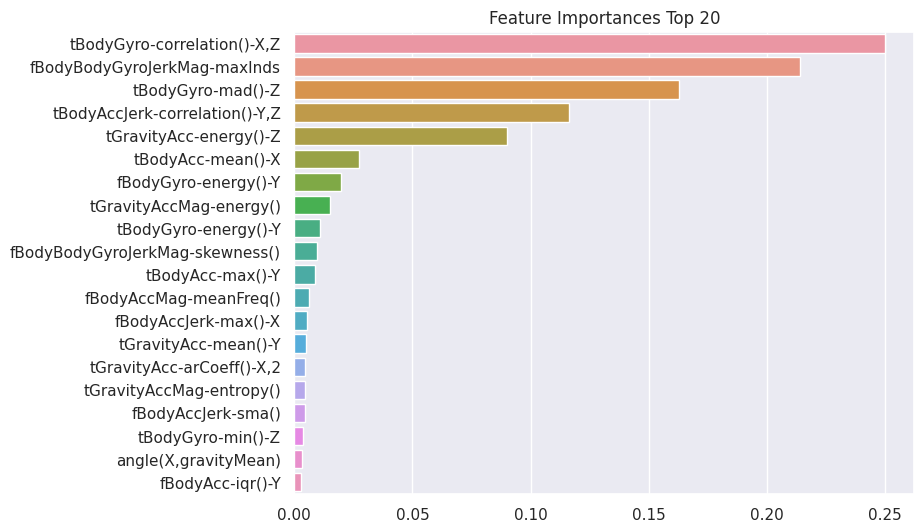

In [29]:
ftr_importance_values = best_dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()